In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [2]:
raw_data = pd.read_csv('epi_r.csv')
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [3]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

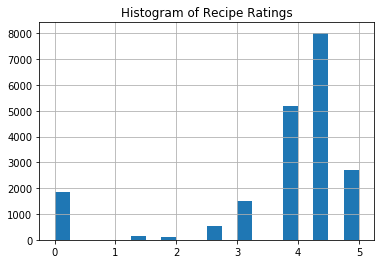

In [4]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [5]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here.

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

### And that is your challenge.

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate might just be happier people.

## Challenge

In order to create a binary classifier, first we need to catagorize the ratings into 'bad' and 'good.' 1 will be good and 0 bad, but where should we set this threshold?

Becasue of the description of the rating coliumn shown above, any review of 4.37 or above will be considered good, and any review lower than 4.37 will be considered bad. 

In [6]:
# create a column for the binary good or bad review 
raw_data['bin rating']=' '

# and populate it
raw_data['bin rating']=raw_data['rating'].apply(lambda x: 1 if x >=4.37 else 0)
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,bin rating
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


As certain columns seem to be binary with few 1 values, the columns with a sum less than 10 will be dropped. 

In [7]:
# find the columns with less than 10 total 1 values and drop them
test=raw_data.iloc[:, 6:]
less10=test[test.columns[test.sum()<10]]
less10list=less10.columns.tolist()
selected=test.drop(less10list, axis=1)
selected.head()

,22-minute meals,3-ingredient recipes,advance prep required,alcoholic,almond,amaretto,anchovy,anise,anniversary,aperitif,...,wine,winter,wok,yellow squash,yogurt,zucchini,snack,snack week,turkey,bin rating
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


There are still 514 columns in the dataframe, so now columns with values below 1500 will be dropped. 

In [8]:
# find the columns with less than 1500 total 1 values and drop them
test=raw_data.iloc[:, 6:]
less1500=test[test.columns[test.sum()<1500]]
less1500list=less1500.columns.tolist()
selected2=test.drop(less1500list, axis=1)
selected2.head()

,bake,bon appétit,dairy free,dessert,dinner,egg,fall,fruit,garlic,gourmet,...,sugar conscious,summer,tomato,tree nut free,vegan,vegetable,vegetarian,wheat/gluten-free,winter,bin rating
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0


Now that the dataset only has 42 columns, we will add the nutrition informaiton back into the dataframe and replace all null values with 0.

In [9]:
# add the nutrition informationb back to dataset
nutrition=raw_data[['calories', 'protein', 'fat', 'sodium']]
selectedfinal=pd.concat([nutrition, selected2], axis=1)
selectedfinal=selectedfinal.fillna(0)
selectedfinal.head()

,calories,protein,fat,sodium,bake,bon appétit,dairy free,dessert,dinner,egg,...,sugar conscious,summer,tomato,tree nut free,vegan,vegetable,vegetarian,wheat/gluten-free,winter,bin rating
0,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,403.0,18.0,23.0,1439.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,547.0,20.0,32.0,452.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0


A heatmap will be used to see how the variables correlate to each other. 

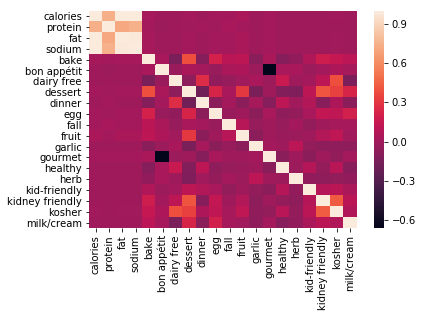

In [10]:
# calculate the correlation matrix of the first 20 variables
corr = selectedfinal.iloc[:, :20].corr()

#plot heatmap of the correlation matrix
sns.heatmap(corr)

All the nutrition information is highly correlated, so only calories will be used from the first half of the matrix. Kidney friendly and kosher also show high correlation, so kid friendly will be selected. How do the remaining variables compare?

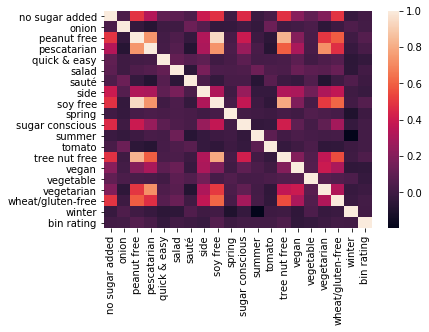

In [11]:
# calculate the correlation matrix of the first 20 variables
corr = selectedfinal.iloc[:, 20:].corr()

#plot heatmap of the correlation matrix
sns.heatmap(corr)

Peanut free and pescatarian are highly correlated, so only peanut free will be selected. For this reason, wheat/gluten-free, soy free, tree nut free, sugar conscious and side will be dropped. 

In [12]:
selectedfinal=selectedfinal.drop(['protein', 'fat', 'sodium', 'kid-friendly', 'pescatarian', 'wheat/gluten-free',
                                  'soy free', 'tree nut free', 'sugar conscious'], axis=1)

Just to make sure, a quick check will be done to make sure this datasethas 30 features and the prediction column.

In [13]:
selectedfinal.head()

,calories,bake,bon appétit,dairy free,dessert,dinner,egg,fall,fruit,garlic,...,sauté,side,spring,summer,tomato,vegan,vegetable,vegetarian,winter,bin rating
0,426.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,403.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,547.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


Now we can call the SVR function:

In [14]:
from sklearn.svm import SVR
svr = SVR()
X = selectedfinal.drop(['bin rating'], 1)
Y = selectedfinal['bin rating']
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [15]:
svr.score(X, Y)

0.22126991467998483

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5, )

array([-0.09864043, -0.18709432, -0.16802799, -0.13062121, -0.16807973])

While feature selection did improve the score, there is still clearly bias in the dataset from the tendency of recipe reviewers to choose certain recipes. Also, the 4.37 split-value for a good and bad rating could affect the accuracy of the score.   

Why are the cross-validation scores here negative?